In [47]:
# きりたんデータセットはハイレゾ(24bit)なので，事前にffmpegなどで変換しておくこと
# -y:上書き，-i:入力，-ac:出力チャネル，-ar:サンプリングレート
!ffmpeg -y -i tsumugi_voice_idolmaster.wav -ac 1 -ar 44100 tsumugi_voice_idolmaster_re.wav

ffmpeg version N-93893-ge45e6005ce Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 8.3.1 (GCC) 20190414
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libmfx --enable-amf --enable-ffnvcodec --enable-cuvid --enable-d3d11va --enable-nvenc --enable-nvdec --enable-dxva2 --enable-avisynth --enable-libopenmpt
  libavutil      56. 28.100 / 5

In [79]:
from scipy.io import wavfile
import numpy as np
import pyworld as pw
import matplotlib.pyplot as plt
from IPython import display
import librosa.display

In [211]:
WAV_FILE = './src/voice/test/tsumugi_voice_idolmaster_re.wav'
# WAV_FILE = './src/song/voice_only/kiritan08_motteke_cut.wav'

In [215]:
fs, data = wavfile.read(WAV_FILE)
data = data.astype(np.float)  # worldはfloatでないと扱えない

## 音声の合成に必要な各特徴量の抽出
timeはデフォルトでは0.005s刻み

cheaptrickはスペクトログラムが時間x周波数(1025\[Hz\])の行列で返ってくる？

In [213]:
_f0, time = pw.dio(data, fs)            # 基本周波数の抽出
f0 = pw.stonemask(data, _f0, time, fs)  # 基本周波数の修正
sp = pw.cheaptrick(data, f0, time, fs)  # スペクトル包絡の抽出
ap = pw.d4c(data, f0, time, fs)         # 非周期性指標の抽出

## 音声の合成

In [202]:
# 音声を合成して保存
synthesized = pw.synthesize(f0, sp, ap, fs)
# wavfile.write('synthesized.wav', fs, synthesized)

display.Audio(synthesized, rate=fs)

## ピッチ:基本周波数($F_0$)の抽出

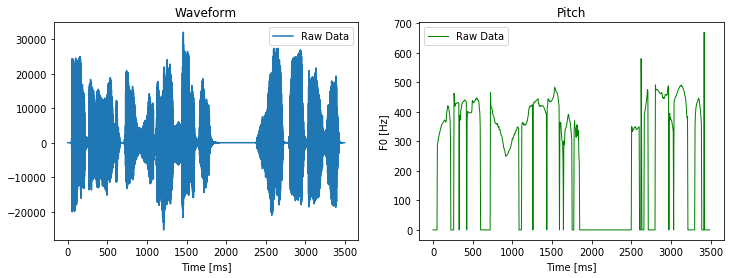

In [216]:
# x軸用に単位をミリ秒に変換(sampling rate = 44100で割ってから1000倍)
axis_time = np.arange(len(data)) / fs * 1000

# 可視化
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(axis_time, data, label='Raw Data')
plt.xlabel('Time [ms]')
plt.title('Waveform')
plt.legend()

plt.subplot(122)
plt.plot(time*1000, f0, linewidth=1, color='g', label='Raw Data')
plt.xlabel('Time [ms]')
plt.ylabel('F0 [Hz]')
plt.title('Pitch')
plt.legend()

plt.show()

display.Audio(data, rate=fs)

## MCEPs(メルケプストラム)の抽出

In [217]:
# メルケプストラムの抽出
coded_sp = pw.code_spectral_envelope(sp, fs, 36)  # row: time, col: 36(dim)

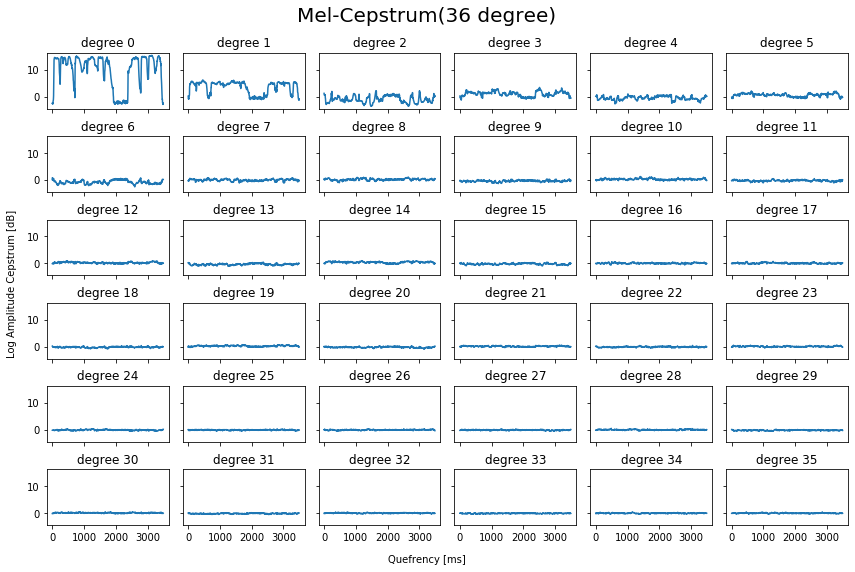

In [218]:
# 可視化
fig, axs = plt.subplots(6, 6, figsize=(12, 8), sharex=True, sharey=True)
d = 0
for i in range(6):
    for j in range(6):
        axs[i, j].plot(time*1000, coded_sp[:, d])
        axs[i, j].set_title('degree {}'.format(d))
        d += 1
plt.tight_layout()
        
# 順に全体のタイトル，調整用，x軸ラベル，y軸ラベル
fig.suptitle('Mel-Cepstrum(36 degree)', fontsize=20)
plt.subplots_adjust(top=0.9, left=0.06, bottom=0.08)
fig.text(0.5, 0.02, 'Quefrency [ms]', ha='center', va='center')
fig.text(0.02, 0.5, 'Log Amplitude Cepstrum [dB]', ha='center', va='center', rotation='vertical')

plt.show()

## 母音

In [219]:
fs, data = wavfile.read('./src/voice/test/tsumugi_voice_a_re.wav')
data = data.astype(np.float)  # worldはfloatでないと扱えない
axis_time = np.arange(len(data)) / fs * 1000  # ms

_f0, time = pw.dio(data, fs)            # 基本周波数の抽出
f0 = pw.stonemask(data, _f0, time, fs)  # 基本周波数の修正
sp = pw.cheaptrick(data, f0, time, fs)  # スペクトル包絡の抽出
ap = pw.d4c(data, f0, time, fs)         # 非周期性指標の抽出

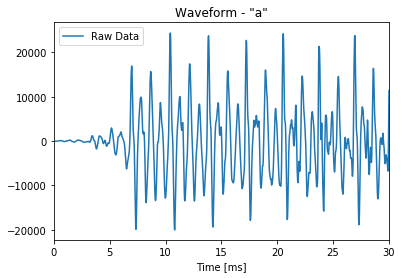

In [221]:
# 可視化
plt.plot(axis_time, data, label='Raw Data')
plt.xlim(0, 30)
plt.xlabel('Time [ms]')
plt.title('Waveform - "a"')
plt.legend()
plt.show()

display.Audio(data, rate=fs)